In [2]:
!pip install shap


   ---------------------------------------- 0.0/544.4 kB ? eta -:--:--
   ---------------------------------------- 0.0/544.4 kB ? eta -:--:--
   ---------------------------------------- 0.0/544.4 kB ? eta -:--:--
   ---------------------------------------- 0.0/544.4 kB ? eta -:--:--
   ------------------- -------------------- 262.1/544.4 kB ? eta -:--:--
   ------------------------------------ - 524.3/544.4 kB 728.2 kB/s eta 0:00:01
   -------------------------------------- 544.4/544.4 kB 644.5 kB/s eta 0:00:00

   -------------------- ------------------- 1/2 [shap]
   -------------------- ------------------- 1/2 [shap]
   -------------------- ------------------- 1/2 [shap]
   -------------------- ------------------- 1/2 [shap]
   -------------------- ------------------- 1/2 [shap]
   -------------------- ------------------- 1/2 [shap]
   -------------------- ------------------- 1/2 [shap]
   ---------------------------------------- 2/2 [shap]




[notice] A new release of pip is available: 25.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [3]:
pip install --upgrade pip

   ---------------------------------------- 0.0/1.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/1.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/1.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/1.8 MB ? eta -:--:--
   ----- ---------------------------------- 0.3/1.8 MB ? eta -:--:--
   ----- ---------------------------------- 0.3/1.8 MB ? eta -:--:--
   ----- ---------------------------------- 0.3/1.8 MB ? eta -:--:--
   ----- ---------------------------------- 0.3/1.8 MB ? eta -:--:--
   ----- ---------------------------------- 0.3/1.8 MB ? eta -:--:--
   ----------- ---------------------------- 0.5/1.8 MB 236.4 kB/s eta 0:00:06
   ----------- ---------------------------- 0.5/1.8 MB 236.4 kB/s eta 0:00:06
   ----------- ---------------------------- 0.5/1.8 MB 236.4 kB/s eta 0:00:06
   ----------------- ---------------------- 0.8/1.8 MB 316.6 kB/s eta 0:00:04
   ----------------- ---------------------- 0.8/1.8 MB 316.6 kB/s e

In [151]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report
import shap #for shaping the model
import warnings
warnings.filterwarnings("ignore")

In [152]:
df = pd.read_csv(r"C:\Users\RAHUL BABU KOPPULA\OneDrive\Desktop\WA_Fn-UseC_-HR-Employee-Attrition.csv")
df

,Unnamed: 0,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,...,YearsSinceLastPromotion,YearsWithCurrManager,DailyRateGroups,HourlyRateGroups,MonthlyIncomeGroups,MonthlyRateGroups,TotalWorkingYearsGroups,YearsAtCompanyGroups,AgeGroups,YearsBeforeCompanyGroups
0,0,41,Yes,Travel_Rarely,1102,Sales,1,College,Life Sciences,1,...,0,5,K - 1100 => 1200,I - 90 => 100,E - 5000 => 6000,S - 19000 => 20000,D - 6 => 10 Years,D - 6 => 10 Years,E - 41 => 50 Years,B - 2 => 3 Years
1,1,49,No,Travel_Frequently,279,Research & Development,8,Below College,Life Sciences,1,...,1,7,B - 200 => 300,F - 60 => 70,E - 5000 => 6000,X - 24000 => 25000,D - 6 => 10 Years,D - 6 => 10 Years,E - 41 => 50 Years,B - 2 => 3 Years
2,2,37,Yes,Travel_Rarely,1373,Research & Development,2,College,Other,1,...,0,0,M - 1300 => 1400,I - 90 => 100,B - 2000 => 3000,B - 2000 => 3000,D - 6 => 10 Years,A - 0 => 1 Year,D - 31 => 40 Years,B - 2 => 3 Years
3,3,33,No,Travel_Frequently,1392,Research & Development,3,Master,Life Sciences,1,...,3,0,M - 1300 => 1400,E - 50 => 60,B - 2000 => 3000,W - 23000 => 24000,D - 6 => 10 Years,D - 6 => 10 Years,D - 31 => 40 Years,B - 2 => 3 Years
4,4,27,No,Travel_Rarely,591,Research & Development,2,Below College,Medical,1,...,2,2,E - 500 => 600,C - 30 => 40,C - 3000 => 4000,P - 16000 => 17000,D - 6 => 10 Years,B - 2 => 3 Years,C - 26 => 30 Years,B - 2 => 3 Years
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,1465,36,No,Travel_Frequently,884,Research & Development,23,College,Medical,1,...,0,3,H - 800 => 900,D - 40 => 50,B - 2000 => 3000,L - 12000 => 13000,F - 16 => 20 Years,C - 4 => 5 Years,D - 31 => 40 Years,B - 2 => 3 Years
1466,1466,39,No,Travel_Rarely,613,Research & Development,6,Below College,Medical,1,...,1,7,F - 600 => 700,D - 40 => 50,I - 9000 => 10000,U - 21000 => 22000,D - 6 => 10 Years,D - 6 => 10 Years,D - 31 => 40 Years,B - 2 => 3 Years
1467,1467,27,No,Travel_Rarely,155,Research & Development,4,Bachelor,Life Sciences,1,...,0,3,A - 100 => 200,H - 80 => 90,F - 6000 => 7000,E - 5000 => 6000,D - 6 => 10 Years,D - 6 => 10 Years,C - 26 => 30 Years,B - 2 => 3 Years
1468,1468,49,No,Travel_Frequently,1023,Sales,2,Bachelor,Medical,1,...,0,8,J - 1000 => 1100,F - 60 => 70,E - 5000 => 6000,M - 13000 => 14000,F - 16 => 20 Years,D - 6 => 10 Years,E - 41 => 50 Years,B - 2 => 3 Years


In [153]:
df.replace([float('inf'), -float('inf')], float('nan'), inplace=True)


In [154]:
df.drop(['Unnamed: 0','EmployeeCount','Over18','StandardHours','EmployeeNumber'], axis=1, inplace=True)
df

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,YearsSinceLastPromotion,YearsWithCurrManager,DailyRateGroups,HourlyRateGroups,MonthlyIncomeGroups,MonthlyRateGroups,TotalWorkingYearsGroups,YearsAtCompanyGroups,AgeGroups,YearsBeforeCompanyGroups
0,41,Yes,Travel_Rarely,1102,Sales,1,College,Life Sciences,2,Female,...,0,5,K - 1100 => 1200,I - 90 => 100,E - 5000 => 6000,S - 19000 => 20000,D - 6 => 10 Years,D - 6 => 10 Years,E - 41 => 50 Years,B - 2 => 3 Years
1,49,No,Travel_Frequently,279,Research & Development,8,Below College,Life Sciences,3,Male,...,1,7,B - 200 => 300,F - 60 => 70,E - 5000 => 6000,X - 24000 => 25000,D - 6 => 10 Years,D - 6 => 10 Years,E - 41 => 50 Years,B - 2 => 3 Years
2,37,Yes,Travel_Rarely,1373,Research & Development,2,College,Other,4,Male,...,0,0,M - 1300 => 1400,I - 90 => 100,B - 2000 => 3000,B - 2000 => 3000,D - 6 => 10 Years,A - 0 => 1 Year,D - 31 => 40 Years,B - 2 => 3 Years
3,33,No,Travel_Frequently,1392,Research & Development,3,Master,Life Sciences,4,Female,...,3,0,M - 1300 => 1400,E - 50 => 60,B - 2000 => 3000,W - 23000 => 24000,D - 6 => 10 Years,D - 6 => 10 Years,D - 31 => 40 Years,B - 2 => 3 Years
4,27,No,Travel_Rarely,591,Research & Development,2,Below College,Medical,1,Male,...,2,2,E - 500 => 600,C - 30 => 40,C - 3000 => 4000,P - 16000 => 17000,D - 6 => 10 Years,B - 2 => 3 Years,C - 26 => 30 Years,B - 2 => 3 Years
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,No,Travel_Frequently,884,Research & Development,23,College,Medical,3,Male,...,0,3,H - 800 => 900,D - 40 => 50,B - 2000 => 3000,L - 12000 => 13000,F - 16 => 20 Years,C - 4 => 5 Years,D - 31 => 40 Years,B - 2 => 3 Years
1466,39,No,Travel_Rarely,613,Research & Development,6,Below College,Medical,4,Male,...,1,7,F - 600 => 700,D - 40 => 50,I - 9000 => 10000,U - 21000 => 22000,D - 6 => 10 Years,D - 6 => 10 Years,D - 31 => 40 Years,B - 2 => 3 Years
1467,27,No,Travel_Rarely,155,Research & Development,4,Bachelor,Life Sciences,2,Male,...,0,3,A - 100 => 200,H - 80 => 90,F - 6000 => 7000,E - 5000 => 6000,D - 6 => 10 Years,D - 6 => 10 Years,C - 26 => 30 Years,B - 2 => 3 Years
1468,49,No,Travel_Frequently,1023,Sales,2,Bachelor,Medical,4,Male,...,0,8,J - 1000 => 1100,F - 60 => 70,E - 5000 => 6000,M - 13000 => 14000,F - 16 => 20 Years,D - 6 => 10 Years,E - 41 => 50 Years,B - 2 => 3 Years


In [155]:
df.dropna(inplace=True)
df

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,YearsSinceLastPromotion,YearsWithCurrManager,DailyRateGroups,HourlyRateGroups,MonthlyIncomeGroups,MonthlyRateGroups,TotalWorkingYearsGroups,YearsAtCompanyGroups,AgeGroups,YearsBeforeCompanyGroups
0,41,Yes,Travel_Rarely,1102,Sales,1,College,Life Sciences,2,Female,...,0,5,K - 1100 => 1200,I - 90 => 100,E - 5000 => 6000,S - 19000 => 20000,D - 6 => 10 Years,D - 6 => 10 Years,E - 41 => 50 Years,B - 2 => 3 Years
1,49,No,Travel_Frequently,279,Research & Development,8,Below College,Life Sciences,3,Male,...,1,7,B - 200 => 300,F - 60 => 70,E - 5000 => 6000,X - 24000 => 25000,D - 6 => 10 Years,D - 6 => 10 Years,E - 41 => 50 Years,B - 2 => 3 Years
2,37,Yes,Travel_Rarely,1373,Research & Development,2,College,Other,4,Male,...,0,0,M - 1300 => 1400,I - 90 => 100,B - 2000 => 3000,B - 2000 => 3000,D - 6 => 10 Years,A - 0 => 1 Year,D - 31 => 40 Years,B - 2 => 3 Years
3,33,No,Travel_Frequently,1392,Research & Development,3,Master,Life Sciences,4,Female,...,3,0,M - 1300 => 1400,E - 50 => 60,B - 2000 => 3000,W - 23000 => 24000,D - 6 => 10 Years,D - 6 => 10 Years,D - 31 => 40 Years,B - 2 => 3 Years
4,27,No,Travel_Rarely,591,Research & Development,2,Below College,Medical,1,Male,...,2,2,E - 500 => 600,C - 30 => 40,C - 3000 => 4000,P - 16000 => 17000,D - 6 => 10 Years,B - 2 => 3 Years,C - 26 => 30 Years,B - 2 => 3 Years
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,No,Travel_Frequently,884,Research & Development,23,College,Medical,3,Male,...,0,3,H - 800 => 900,D - 40 => 50,B - 2000 => 3000,L - 12000 => 13000,F - 16 => 20 Years,C - 4 => 5 Years,D - 31 => 40 Years,B - 2 => 3 Years
1466,39,No,Travel_Rarely,613,Research & Development,6,Below College,Medical,4,Male,...,1,7,F - 600 => 700,D - 40 => 50,I - 9000 => 10000,U - 21000 => 22000,D - 6 => 10 Years,D - 6 => 10 Years,D - 31 => 40 Years,B - 2 => 3 Years
1467,27,No,Travel_Rarely,155,Research & Development,4,Bachelor,Life Sciences,2,Male,...,0,3,A - 100 => 200,H - 80 => 90,F - 6000 => 7000,E - 5000 => 6000,D - 6 => 10 Years,D - 6 => 10 Years,C - 26 => 30 Years,B - 2 => 3 Years
1468,49,No,Travel_Frequently,1023,Sales,2,Bachelor,Medical,4,Male,...,0,8,J - 1000 => 1100,F - 60 => 70,E - 5000 => 6000,M - 13000 => 14000,F - 16 => 20 Years,D - 6 => 10 Years,E - 41 => 50 Years,B - 2 => 3 Years


In [156]:
df['Attrition'] = df['Attrition'].map({'Yes': 1, 'No': 0})


In [157]:
df = pd.get_dummies(df, drop_first=True)
df

,Age,Attrition,DailyRate,DistanceFromHome,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobSatisfaction,MonthlyIncome,MonthlyRate,...,YearsAtCompanyGroups_F - 16 => 20 Years,YearsAtCompanyGroups_G - 21 => 25 Years,YearsAtCompanyGroups_H - 25 => 30 Years,YearsAtCompanyGroups_I - 31 => 35 Years,YearsAtCompanyGroups_J - 36 => 40 Years,AgeGroups_B - 22 => 25 Years,AgeGroups_C - 26 => 30 Years,AgeGroups_D - 31 => 40 Years,AgeGroups_E - 41 => 50 Years,AgeGroups_F - 51 => 60 Years
0,41,1,1102,1,2,94,3,4,5993,19479,...,False,False,False,False,False,False,False,False,True,False
1,49,0,279,8,3,61,2,2,5130,24907,...,False,False,False,False,False,False,False,False,True,False
2,37,1,1373,2,4,92,2,3,2090,2396,...,False,False,False,False,False,False,False,True,False,False
3,33,0,1392,3,4,56,3,3,2909,23159,...,False,False,False,False,False,False,False,True,False,False
4,27,0,591,2,1,40,3,2,3468,16632,...,False,False,False,False,False,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,0,884,23,3,41,4,4,2571,12290,...,False,False,False,False,False,False,False,True,False,False
1466,39,0,613,6,4,42,2,1,9991,21457,...,False,False,False,False,False,False,False,True,False,False
1467,27,0,155,4,2,87,4,2,6142,5174,...,False,False,False,False,False,False,True,False,False,False
1468,49,0,1023,2,4,63,2,2,5390,13243,...,False,False,False,False,False,False,False,False,True,False


In [158]:
df = df.apply(pd.to_numeric, errors='coerce')
df

,Age,Attrition,DailyRate,DistanceFromHome,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobSatisfaction,MonthlyIncome,MonthlyRate,...,YearsAtCompanyGroups_F - 16 => 20 Years,YearsAtCompanyGroups_G - 21 => 25 Years,YearsAtCompanyGroups_H - 25 => 30 Years,YearsAtCompanyGroups_I - 31 => 35 Years,YearsAtCompanyGroups_J - 36 => 40 Years,AgeGroups_B - 22 => 25 Years,AgeGroups_C - 26 => 30 Years,AgeGroups_D - 31 => 40 Years,AgeGroups_E - 41 => 50 Years,AgeGroups_F - 51 => 60 Years
0,41,1,1102,1,2,94,3,4,5993,19479,...,False,False,False,False,False,False,False,False,True,False
1,49,0,279,8,3,61,2,2,5130,24907,...,False,False,False,False,False,False,False,False,True,False
2,37,1,1373,2,4,92,2,3,2090,2396,...,False,False,False,False,False,False,False,True,False,False
3,33,0,1392,3,4,56,3,3,2909,23159,...,False,False,False,False,False,False,False,True,False,False
4,27,0,591,2,1,40,3,2,3468,16632,...,False,False,False,False,False,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,0,884,23,3,41,4,4,2571,12290,...,False,False,False,False,False,False,False,True,False,False
1466,39,0,613,6,4,42,2,1,9991,21457,...,False,False,False,False,False,False,False,True,False,False
1467,27,0,155,4,2,87,4,2,6142,5174,...,False,False,False,False,False,False,True,False,False,False
1468,49,0,1023,2,4,63,2,2,5390,13243,...,False,False,False,False,False,False,False,False,True,False


In [159]:
X = df.drop('Attrition', axis=1)
y = df['Attrition']
print(X)
print(y)

      Age  DailyRate  DistanceFromHome  EnvironmentSatisfaction  HourlyRate  \
0      41       1102                 1                        2          94   
1      49        279                 8                        3          61   
2      37       1373                 2                        4          92   
3      33       1392                 3                        4          56   
4      27        591                 2                        1          40   
...   ...        ...               ...                      ...         ...   
1465   36        884                23                        3          41   
1466   39        613                 6                        4          42   
1467   27        155                 4                        2          87   
1468   49       1023                 2                        4          63   
1469   34        628                 8                        2          82   

      JobInvolvement  JobSatisfaction  MonthlyIncom

In [160]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [161]:
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [162]:
y_pred = model.predict(X_test)
y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

In [163]:
print(confusion_matrix(y_test, y_pred))

[[253   2]
 [ 35   4]]


In [164]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.88      0.99      0.93       255
           1       0.67      0.10      0.18        39

    accuracy                           0.87       294
   macro avg       0.77      0.55      0.55       294
weighted avg       0.85      0.87      0.83       294



<Figure size 640x480 with 0 Axes>

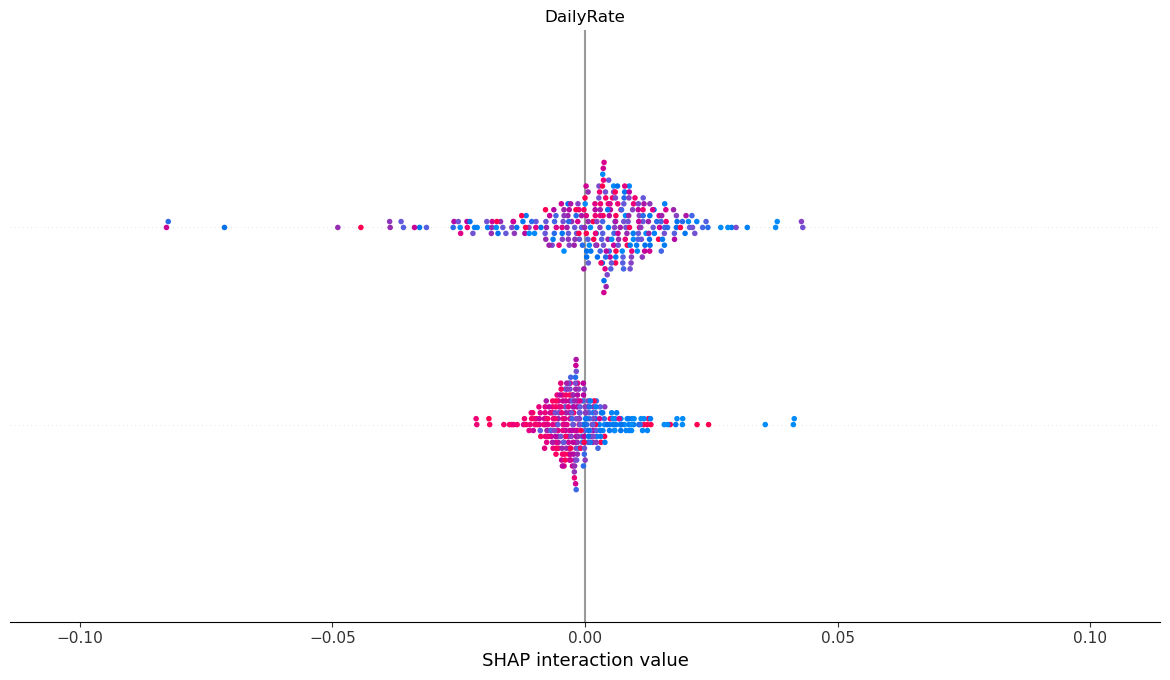

In [165]:
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X_test)
shap.summary_plot(shap_values[:], X_test)

In [166]:
df['Attrition_Prob'] = model.predict_proba(X)[:, 1]

In [167]:
df.to_csv("attrition_dashboard_data.csv", index=False)

In [168]:
df

,Age,Attrition,DailyRate,DistanceFromHome,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobSatisfaction,MonthlyIncome,MonthlyRate,...,YearsAtCompanyGroups_G - 21 => 25 Years,YearsAtCompanyGroups_H - 25 => 30 Years,YearsAtCompanyGroups_I - 31 => 35 Years,YearsAtCompanyGroups_J - 36 => 40 Years,AgeGroups_B - 22 => 25 Years,AgeGroups_C - 26 => 30 Years,AgeGroups_D - 31 => 40 Years,AgeGroups_E - 41 => 50 Years,AgeGroups_F - 51 => 60 Years,Attrition_Prob
0,41,1,1102,1,2,94,3,4,5993,19479,...,False,False,False,False,False,False,False,True,False,0.77
1,49,0,279,8,3,61,2,2,5130,24907,...,False,False,False,False,False,False,False,True,False,0.01
2,37,1,1373,2,4,92,2,3,2090,2396,...,False,False,False,False,False,False,True,False,False,0.75
3,33,0,1392,3,4,56,3,3,2909,23159,...,False,False,False,False,False,False,True,False,False,0.13
4,27,0,591,2,1,40,3,2,3468,16632,...,False,False,False,False,False,True,False,False,False,0.07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,0,884,23,3,41,4,4,2571,12290,...,False,False,False,False,False,False,True,False,False,0.01
1466,39,0,613,6,4,42,2,1,9991,21457,...,False,False,False,False,False,False,True,False,False,0.00
1467,27,0,155,4,2,87,4,2,6142,5174,...,False,False,False,False,False,True,False,False,False,0.03
1468,49,0,1023,2,4,63,2,2,5390,13243,...,False,False,False,False,False,False,False,True,False,0.05


In [230]:
axes[0, 0].set_title("Correlation Heatmap")
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5, ax=axes[0, 0])

<Figure size 640x480 with 0 Axes>

In [233]:
axes[0, 1].set_title('Distribution of Age')
sns.histplot(df['Age'], kde=True, color='skyblue', bins=30, ax=axes[0, 1])

<Figure size 640x480 with 0 Axes>

In [234]:
axes[1, 0].set_title('Distribution of DailyRate')
sns.histplot(df['DailyRate'], kde=True, color='orange', bins=30, ax=axes[1, 0])

<Figure size 640x480 with 0 Axes>

In [235]:
axes[1, 1].set_title('Attrition vs Age')
sns.boxplot(x='Attrition', y='Age', data=df, palette='Set2', ax=axes[1, 1])


<Figure size 640x480 with 0 Axes>

In [236]:
feature_importances = model.feature_importances_
features = X.columns
axes[2, 0].set_title('Feature Importances (Random Forest)')
sns.barplot(x=feature_importances, y=features, palette='viridis', ax=axes[2, 0])

<Axes: title={'center': 'Feature Importances (Random Forest)'}>

Text(0.5, 1.0, 'SHAP Dependence Plot for Age')

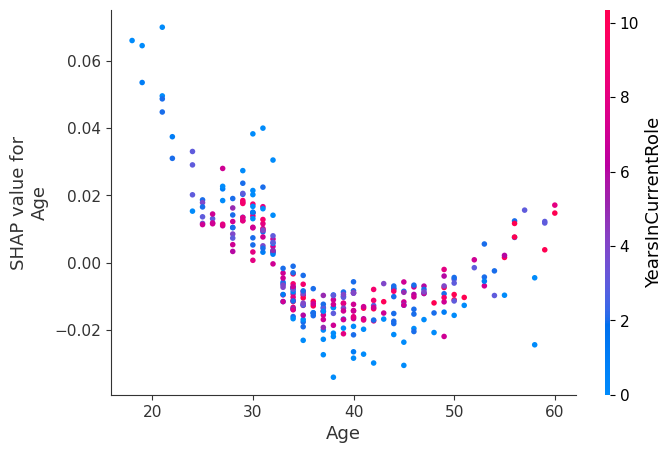

In [229]:
shap_values_single = shap_values[:, :, 1]
shap.dependence_plot('Age', shap_values_single, X_test.reset_index(drop=True), show=False)
axes[2, 1].set_title("SHAP Dependence Plot for Age")

In [ ]:
# As the rows contain very less the plotting doesnt loaded in my system 

In [238]:
df['Attrition_Prob'] = model.predict_proba(X)[:, 1]
df.to_csv("attrition_dashboard_data.csv", index=False)